# Деревья решений

Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации. Приведем пример из области консультирования научных сотрудников института. Высшая Школа Экономики выпускает инфо-схемы, облегчающие жизнь своим сотрудникам. Вот фрагмент инструкции по публикации научной статьи на портале института.

<img src="https://habrastorage.org/files/401/8cd/bea/4018cdbea7a64306be94ed784fce4a06.png" />

В терминах машинного обучения можно сказать, что это элементарный классификатор, который определяет форму публикации на портале (книга, статья, глава книги, препринт, публикация в "НИУ ВШЭ и СМИ") по нескольким признакам: типу публикации (монография, брошюра, статья и т.д.), типу издания, где опубликована статья (научный журнал, сборник трудов и т.д.) и остальным.


## Кредитный скоринг экспертами

<img src="https://habrastorage.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif" />

In [ ]:
import numpy as np

## Энтропия

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i}$$

Некая мера хаоса в системе. Чем больше значение, тем больше хаоса

Для иллюстрации того, как энтропия поможет определить хорошие признаки для построения дерева, будем предсказывать цвет шарика по его координате. Конечно, ничего общего с жизнью это не имеет, но позволяет показать, как энтропия используется для построения дерева решений.

<img src="https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png" />

Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью $p_1=\frac{9}{20}$ будет синим и с вероятностью $p_2=\frac{11}{20}$ – желтым. Значит, энтропия состояния $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. Само это значение пока ни о чем нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы – с координатой меньше либо равной 12 и больше 12.

<img src="https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png" />

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно.

Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации.
Формально прирост информации (information gain, IG) определяется как

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i$$

Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

<img src="https://habrastorage.org/files/dae/a88/2b0/daea882b0a8e4ef4b23325c88f0353a1.png" />

## Пример

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
np.r_[np.array([0, 1]), np.array([2, 3])]

array([0, 1, 2, 3])

In [ ]:
np.c_[np.array([0, 1]), np.array([2, 3])]

array([[0, 2],
       [1, 3]])

In [ ]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

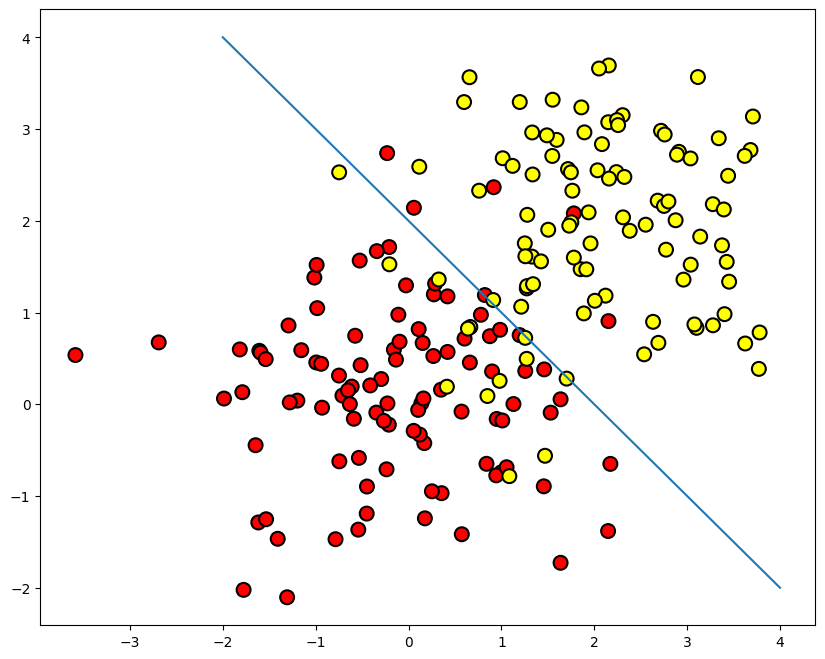

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1

In [ ]:
print(x_min, x_max)
print(y_min, y_max)

-4.586783051890802 4.780677413991395
-3.1038286380873417 4.692796488257486


In [ ]:
xx.shape

(780, 937)

In [ ]:
xx, yy = get_grid(train_data)

In [ ]:
xx.ravel().shape

(730860,)

In [ ]:
xx.shape

(780, 937)

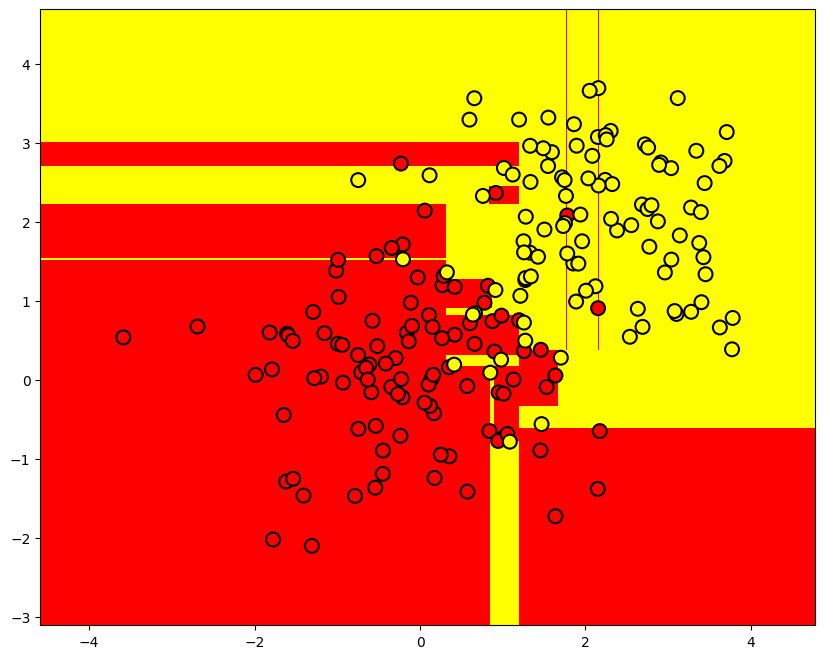

In [ ]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=15,
                                  random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);

### Код отображения дерева

In [ ]:
!pip install pydotplus

In [ ]:
!conda install -c conda-forge -n bioteh pydotplus --y

/bin/bash: line 1: conda: command not found


In [ ]:
!conda install -c conda-forge -n bioteh pydot --y

/bin/bash: line 1: conda: command not found


In [ ]:
!brew install graphviz

/bin/bash: line 1: brew: command not found


In [ ]:
import sklearn

In [ ]:
from six import StringIO

In [ ]:
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
# from sklearn.externals.six import StringIO
import pydotplus

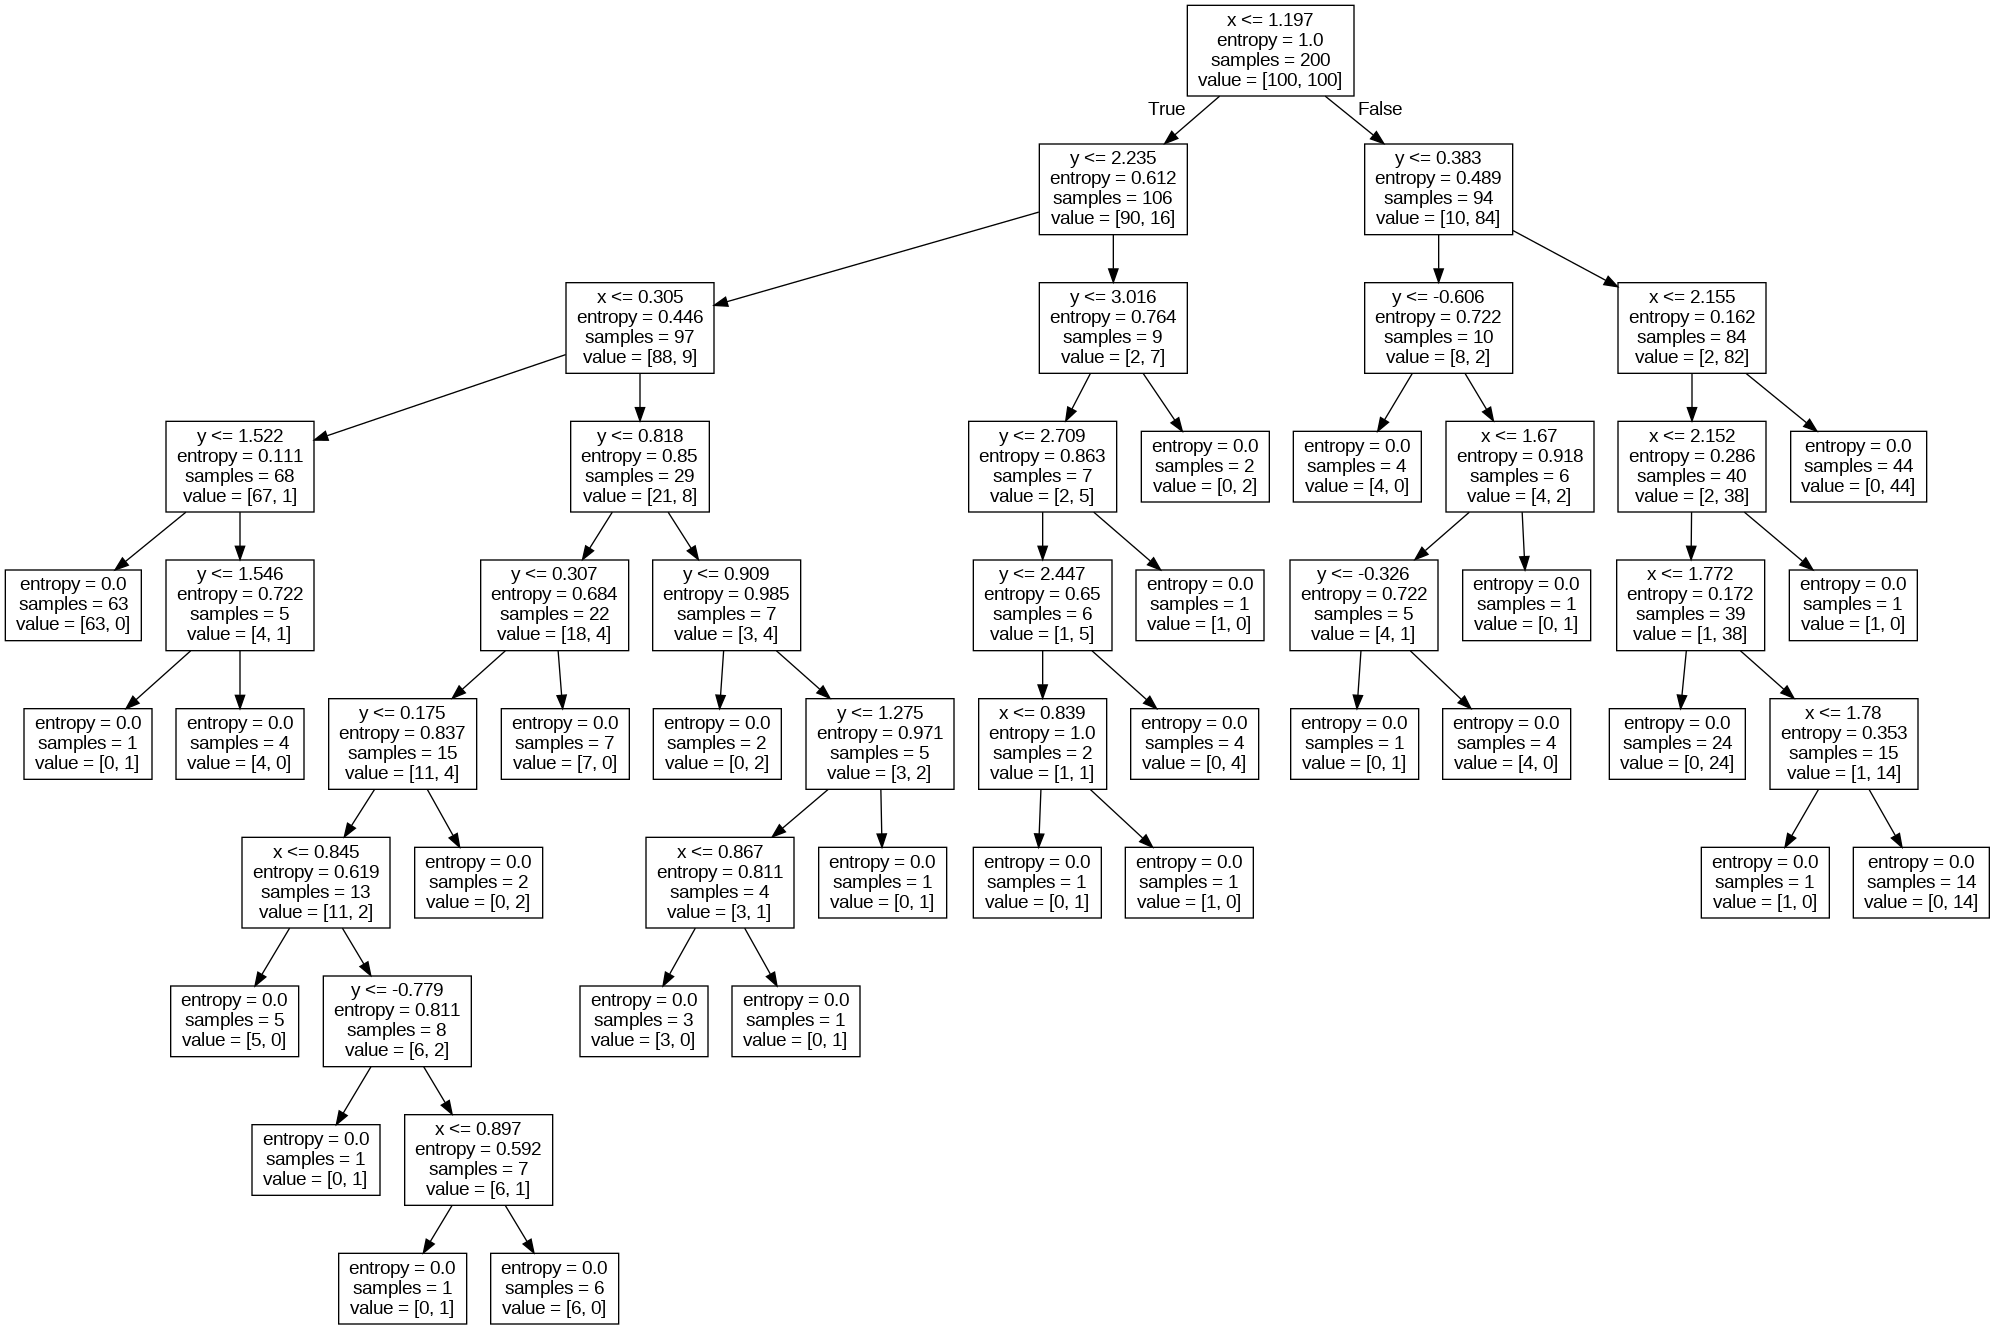

In [ ]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data, feature_names=['x', 'y'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
graph

## One Hot Encoding required

In [ ]:
data = pd.DataFrame({'Country': ['RU', 'USA',
                                 'RU', 'RU',
                                 'UK', 'GER',
                                 'GER', 'USA', 'GER'],
                     'gender':[1,0,1,1,0,1,1,1,0],
              'Target': [1, 0, 1, 1, 0, 1, 0, 0, 0]})

In [ ]:
data_1 = pd.get_dummies(data,columns = ['Country'])

In [ ]:
data_1.head()

,gender,Target,Country_GER,Country_RU,Country_UK,Country_USA
0,1,1,False,True,False,False
1,0,0,False,False,False,True
2,1,1,False,True,False,False
3,1,1,False,True,False,False
4,0,0,False,False,True,False


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(data_1.drop('Target',axis = 1),
       data_1['Target'])

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt.predict_proba([[0,1,1,0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [ ]:
dt.predict([[0,1,0,0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

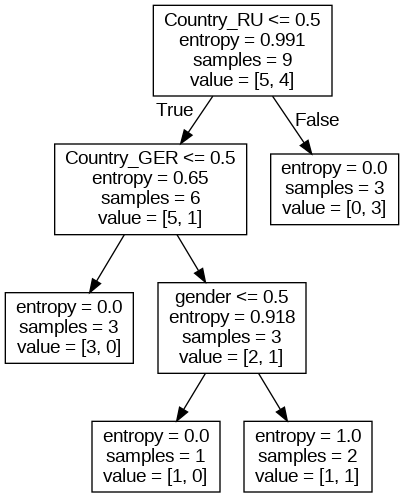

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                feature_names=['gender','Country_GER','Country_RU','Country_UK','Country_USA'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Как дерево решений работает с количественными признаками

Рассмотрим это на игрушечном примере. Пусть имеется следующая выборка:

<img src="https://habrastorage.org/files/5e0/213/081/5e0213081b034e63aa76e2086e521519.png" />

In [ ]:
data = pd.DataFrame({'Возраст': [17, 64, 18,
                                 20, 38, 49,
                                 55, 25, 29,
                                 31, 33],
                     'Невозврат кредита': [1, 0, 1,
                                           0, 1, 0,
                                           0, 1, 1,
                                           0, 1]})

In [ ]:
data.sort_values(by='Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Обучим на этих данных дерево решений (без ограничения глубины) и посмотрим на него.

In [ ]:
age_tree = DecisionTreeClassifier(random_state=17,
                                  criterion='entropy')
age_tree.fit(data['Возраст'].values.reshape(-1, 1),
             data['Невозврат кредита'].values)

DecisionTreeClassifier(criterion='entropy', random_state=17)

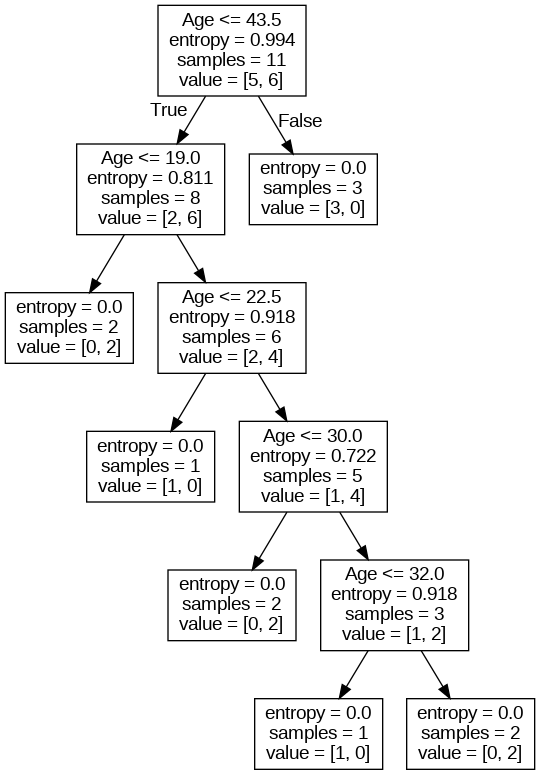

In [ ]:
dot_data = StringIO()
export_graphviz(age_tree,
                out_file=dot_data,
                feature_names=['Age'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
data2 = pd.DataFrame({'Возраст': [17, 64, 18,
                                  20, 38, 49,
                                  55, 25, 29,
                                  31, 33],
                     'Зарплата': [25, 80, 22,
                                  36, 37, 59,
                                  74, 70, 33,
                                  102, 88],
                     'Невозврат кредита': [1, 0, 1,
                                           0, 1, 0,
                                           0, 1, 1,
                                           0, 1]})

<Axes: xlabel='Возраст', ylabel='Зарплата'>

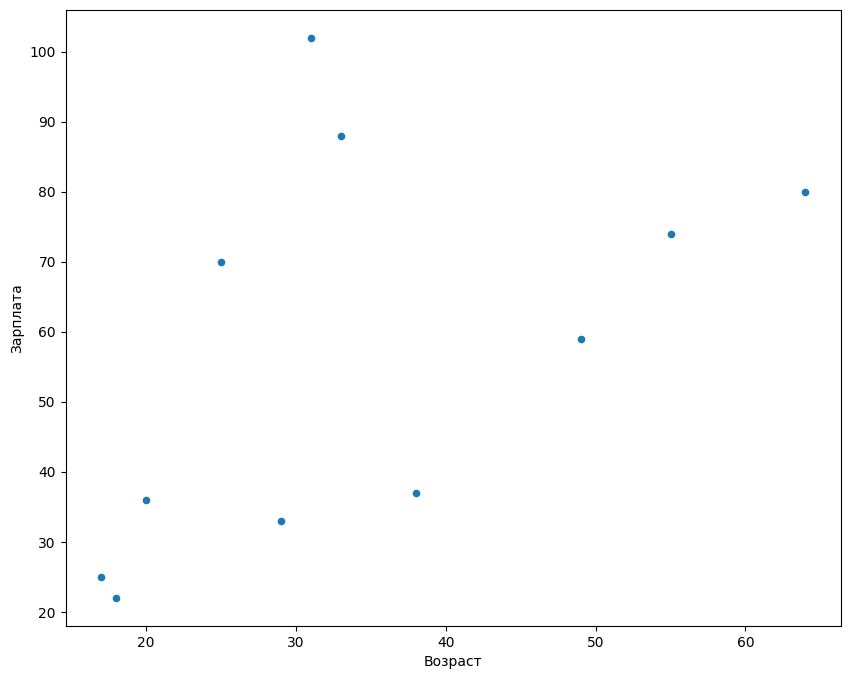

In [ ]:
data2[['Возраст','Зарплата']].plot.scatter(x='Возраст',y = 'Зарплата')

<Axes: xlabel='Возраст', ylabel='Зарплата'>

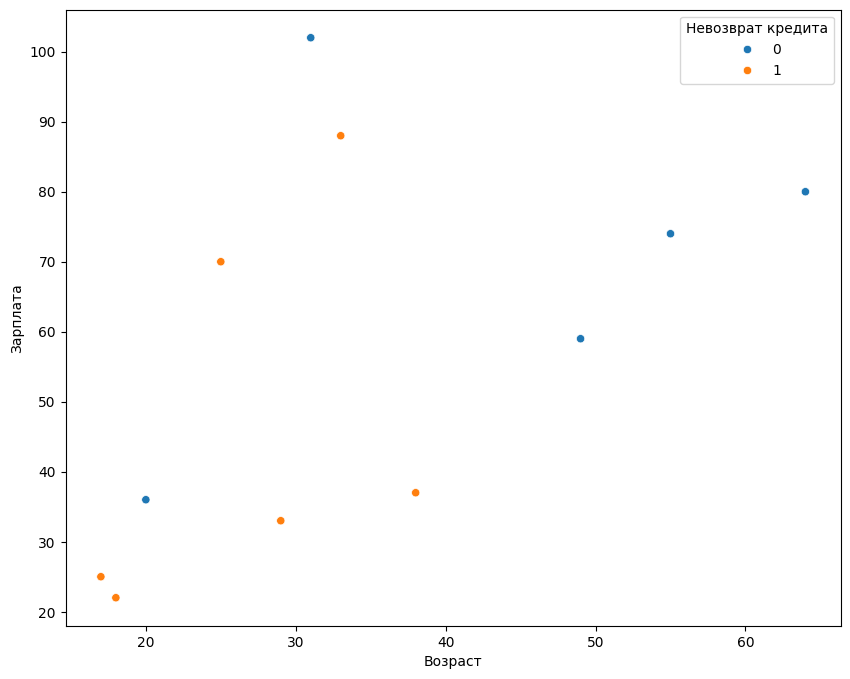

In [ ]:
sns.scatterplot(data = data2,
                x='Возраст',y = 'Зарплата',
                hue = 'Невозврат кредита' )

In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state=17,
                                      criterion='entropy')
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values,
                 data2['Невозврат кредита'].values);

In [ ]:
age_sal_tree.predict_proba([[35, 50]])

array([[0., 1.]])

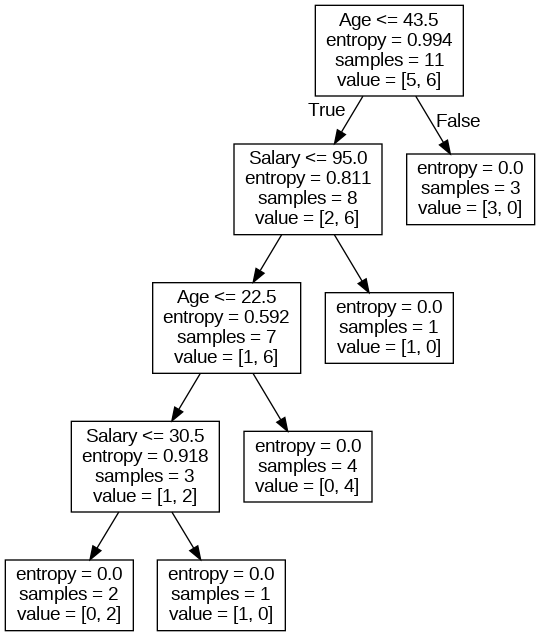

In [ ]:
dot_data = StringIO()
export_graphviz(age_sal_tree, out_file=dot_data, feature_names=['Age', 'Salary'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Класс DecisionTreeClassifier в Scikit-learn

Основные параметры класса sklearn.tree.DecisionTreeClassifier:


* max_depth – максимальная глубина дерева
* max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
* min_samples_leaf – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации, про нее чуть ниже.

## Дерево решений в задаче регрессии

При прогнозировании количественного признака идея построения дерева остается та же, но меняется критерий качества:

Дисперсия вокруг среднего: $\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2$

где ${\ell}$ – число объектов в листе, $y_i$ – значения целевого признака. Попросту говоря, минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

## Пример

Сгенерируем данные, распределенные вокруг функции $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ c некоторым шумом, обучим на них дерево решений и изобразим, какие прогнозы делает дерево.

In [2]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

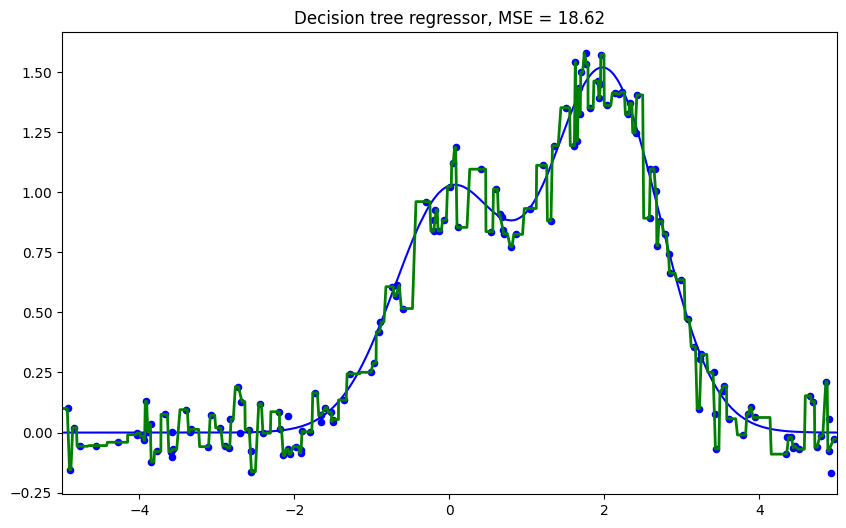

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=50,
                                 random_state=12)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

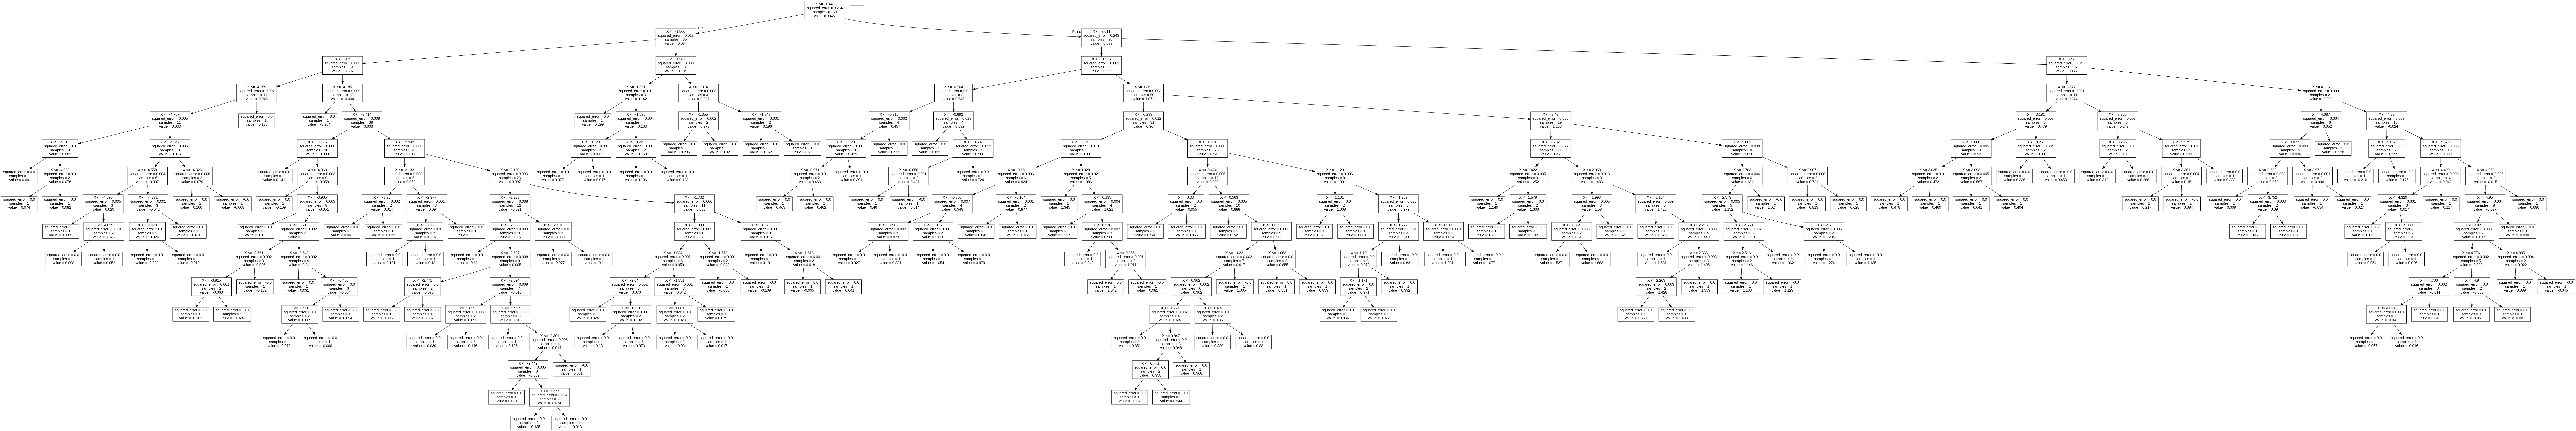

In [ ]:
dot_data = StringIO()
export_graphviz(reg_tree,
                out_file=dot_data,
                feature_names=['X'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Примеры применения

### Деревья решений в задаче прогнозирования оттока клиентов телеком-оператора

Считаем данные в DataFrame и проведем предобработку. Штаты пока сохраним в отдельный объект Series, но удалим из датафрейма. Первую модель будем обучать без штатов, потом посмотрим, помогают ли они.


In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
import pandas as pd

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df['International plan'] = pd.factorize(df['International plan'])[0]

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [9]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5,
                              random_state=17)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [13]:
from sklearn import metrics

<Axes: xlabel='Churn'>

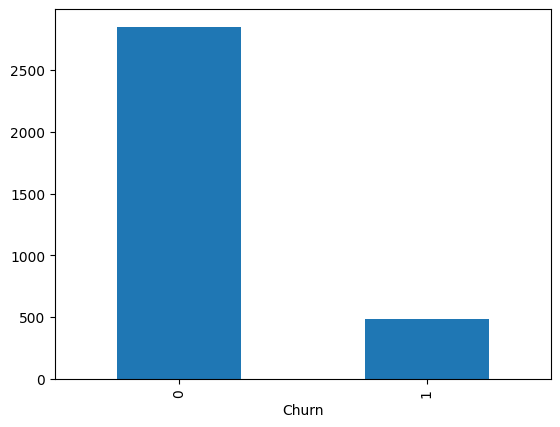

In [14]:
y.value_counts().plot.bar()

In [15]:
tree_pred = tree.predict(X_holdout)
metrics.accuracy_score(y_holdout, tree_pred)

0.94

In [16]:
tree_pred = tree.predict(X_holdout)
metrics.roc_auc_score(y_holdout, tree_pred)

0.8094457597280398

## Настройка параметров модели

In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [22]:
tree_params = {'max_depth': range(1,11),
                'max_features': range(4,19),
               'class_weight':[None]}

In [23]:
tree_params = dict(max_depth=range(1,11),
                   max_features=range(4,19))

In [24]:
tree_grid = GridSearchCV(tree,
                         tree_params,
                        cv=5, n_jobs=-1,
                        verbose=10,
                        refit = 'f1')

In [ ]:
9*14*5

630

In [27]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             refit='f1', verbose=10)

In [26]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [29]:
metrics.accuracy_score(y_holdout,
                       tree_grid.predict(X_holdout))

0.946

In [30]:
metrics.roc_auc_score(y_holdout,
                      tree_grid.predict(X_holdout))

0.8224540590229901

In [31]:
metrics.f1_score(y_holdout,
                 tree_grid.predict(X_holdout))

0.7631578947368421

<Axes: >

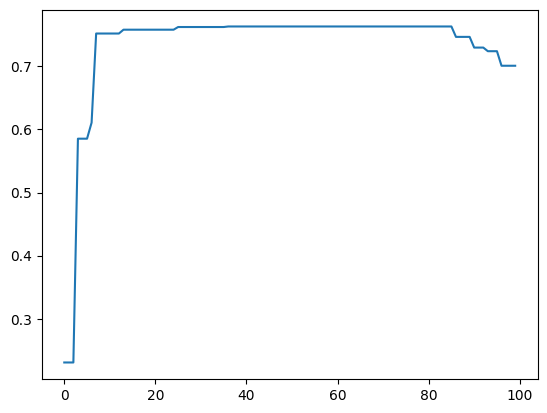

In [32]:
pd.Series([metrics.f1_score(y_holdout,
                            tree_grid.predict_proba(X_holdout)[:,1]>i/100)
           for i in range(100)]).plot()

## Сложный случай для деревьев решений

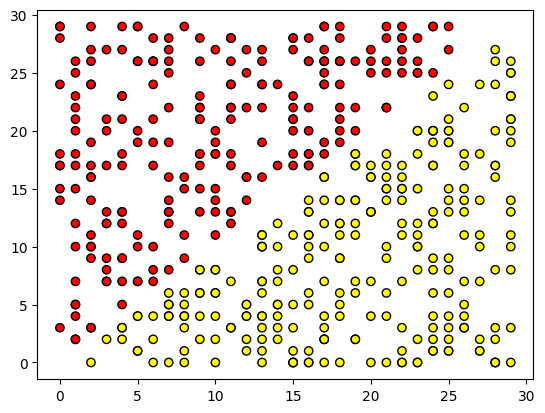

In [34]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

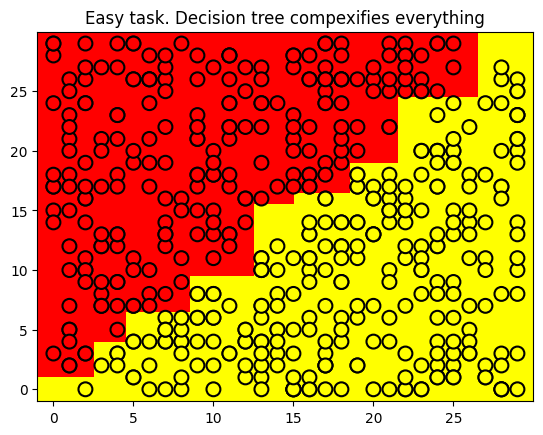

In [35]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

Вот такая сложная конструкция, хотя решение (хорошая разделяющая поверхность) – это всего лишь прямая $x_1 = x_2$.

## Деревья решений в задаче распознавания рукописных цифр MNIST

Теперь посмотрим на описанные 2 алгоритма в реальной задаче. Используем "встроенные" в sklearn данные по рукописным цифрам. Эта задача будет примером, когда метод ближайших соседей работает на удивление хорошо.


Картинки здесь представляются матрицей 8 x 8 (интенсивности белого цвета для каждого пикселя). Далее эта матрица "разворачивается" в вектор длины 64, получается признаковое описание объекта.

Нарисуем несколько рукописных цифр, видим, что они угадываются.

In [36]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
X[0]

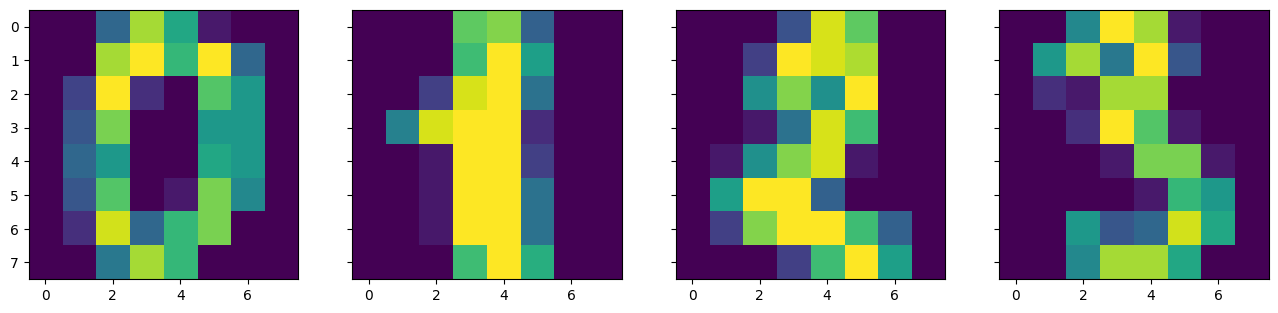

In [37]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

In [40]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [41]:
X_train.shape

(1257, 64)

In [42]:
from sklearn import metrics

In [43]:
tree_pred = tree.predict(X_holdout)
metrics.accuracy_score(y_holdout, tree_pred)

0.6666666666666666

In [44]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [45]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [46]:
tree_pred = tree_grid.predict(X_holdout)
metrics.accuracy_score(y_holdout, tree_pred)

0.8425925925925926

## Плюсы и минусы деревьев решений

#### Плюсы:

* Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, то отказать в кредите". Это свойство называют интерпретируемостью модели;
* Деревья решений могут легко визуализироваться, то есть может "интерпретироваться" (строгого определения я не видел) как сама модель (дерево), так и прогноз для отдельного взятого тестового объекта (путь в дереве);
* Быстрые процессы обучения и прогнозирования;
* Малое число параметров модели;
* Поддержка и числовых, и категориальных признаков.

#### Минусы:

* У порождения четких правил классификации есть и другая сторона: деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка (например, если убрать один из признаков или добавить несколько объектов), поэтому и правила классификации могут сильно изменяться, что ухудшает интерпретируемость модели;
* Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси), и на практике дерево решений по качеству классификации уступает некоторым другим методам;
* Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение — проблема всех методов машинного обучения;
* Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений (рассмотрим далее);
* Проблема поиска оптимального дерева решений (минимального по размеру и способного без ошибок классифицировать выборку) NP-полна, поэтому на практике используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева;
* Сложно поддерживаются пропуски в данных. Friedman оценил, что на поддержку пропусков в данных ушло около 50% кода CART (классический алгоритм построения деревьев классификации и регрессии – Classification And Regression Trees, в sklearn реализована улучшенная версия именно этого алгоритма);
* Модель умеет только интерполировать, но не экстраполировать (это же верно и для леса и бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки. В нашем примере с желтыми и синими шариками это значит, что модель дает одинаковый прогноз для всех шариков с координатой > 19 или < 0.